# Project 9: Partial Correlations and Directed Acyclic Graphs


## Chains

Text(0.5, 1.0, 'Chain')

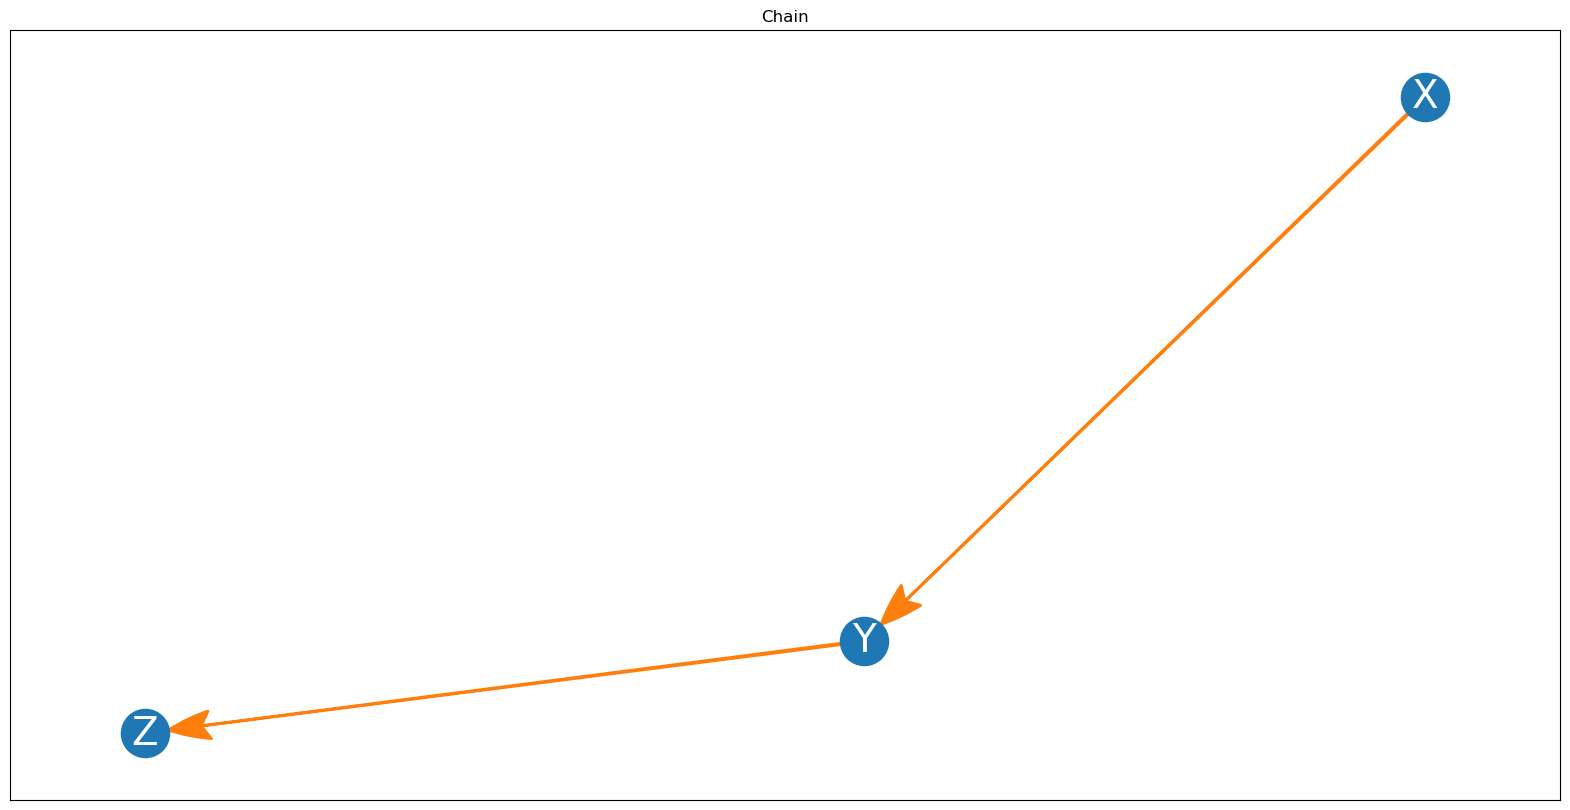

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import ArrowStyle

# initiate graph object
G = nx.DiGraph()
G.add_edges_from([("X", "Y"), ("Y", "Z")])
pos = nx.spring_layout(G)
arrow_style = ArrowStyle("Fancy, head_length=3, head_width=2, tail_width=.1")
# graph
fig, ax = plt.subplots(figsize = (20,10))
nx.draw_networkx(G, pos, node_size = 1200,
                with_labels = True, arrows = True,
                font_color = "white",
                font_size = 28, alpha = 1,
                width = 2, edge_color = "C1",
                arrowstyle = arrow_style,
                ax = ax)
ax.set_title("Chain")

In [2]:
# import random
import numpy as np
import pandas as pd

length = 100000
cols = ["X", "Y", "Z"]
chain = {col:[] for col in cols}
for i in range(length):
    chain["X"].append(np.random.normal(0,1))
    chain["Y"].append(chain["X"][-1] * -1 + np.random.normal(0,2))
    chain["Z"].append(chain["Y"][-1] * .5 + np.random.normal(0,1))

chain = pd.DataFrame(chain)
chain.tail()

,X,Y,Z
99995,-0.282108,1.120891,0.836755
99996,-1.411923,1.105020,-1.341458
99997,-0.328173,2.619571,0.632946
99998,-0.643375,-0.815036,0.035485
99999,-0.662917,2.684592,-0.542023


In [3]:
chain.corr()

,X,Y,Z
X,1.000000,-0.451869,-0.332578
Y,-0.451869,1.000000,0.746569
Z,-0.332578,0.746569,1.000000


C:\Users\JLCat\githubrepositories\Learn-Python-for-Stats-and-Econ\In Class Demonstrations\datlib\plots.py:145: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(data, c = c, alpha = alpha, s = 200 / num_vars, ax=ax)


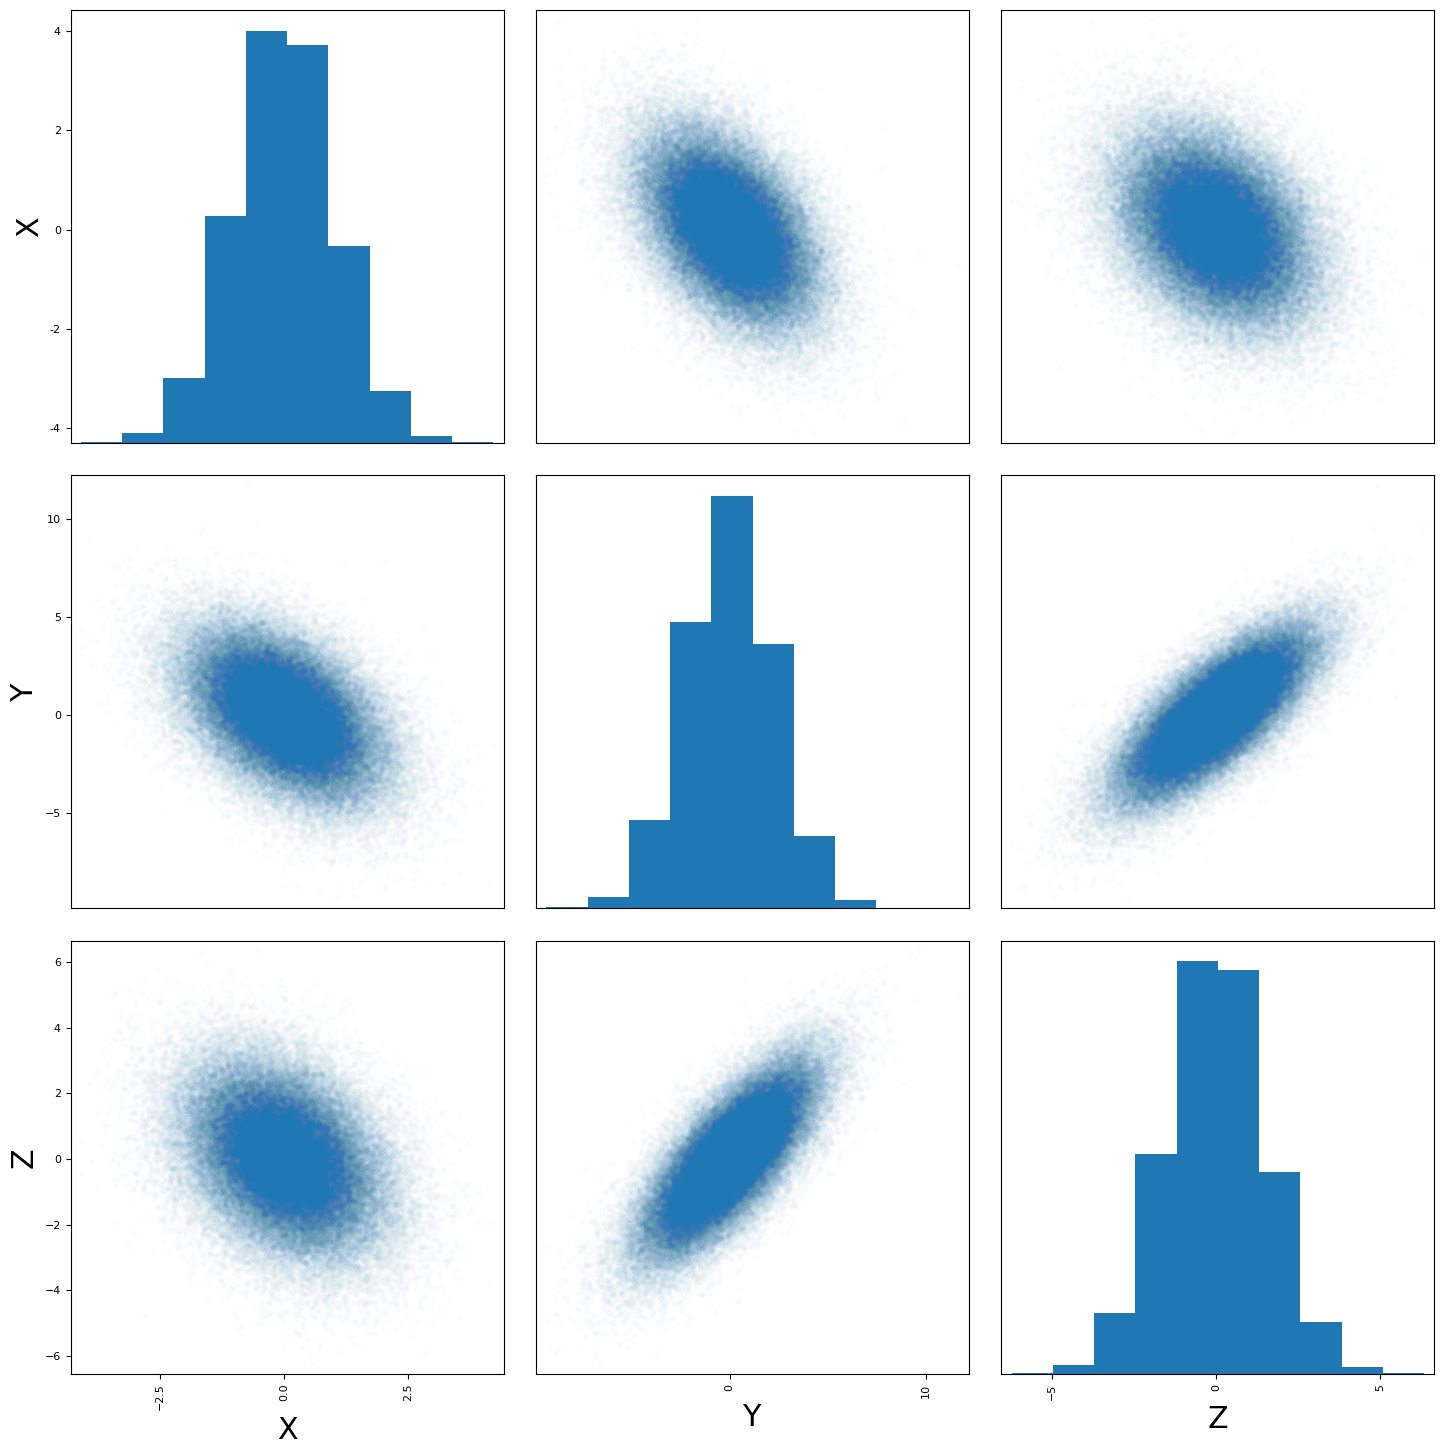

In [4]:
plt.rcParams.update({"font.size":30})
from datlib.plots import *
formatted_scatter_matrix(chain, alpha = 0.015)

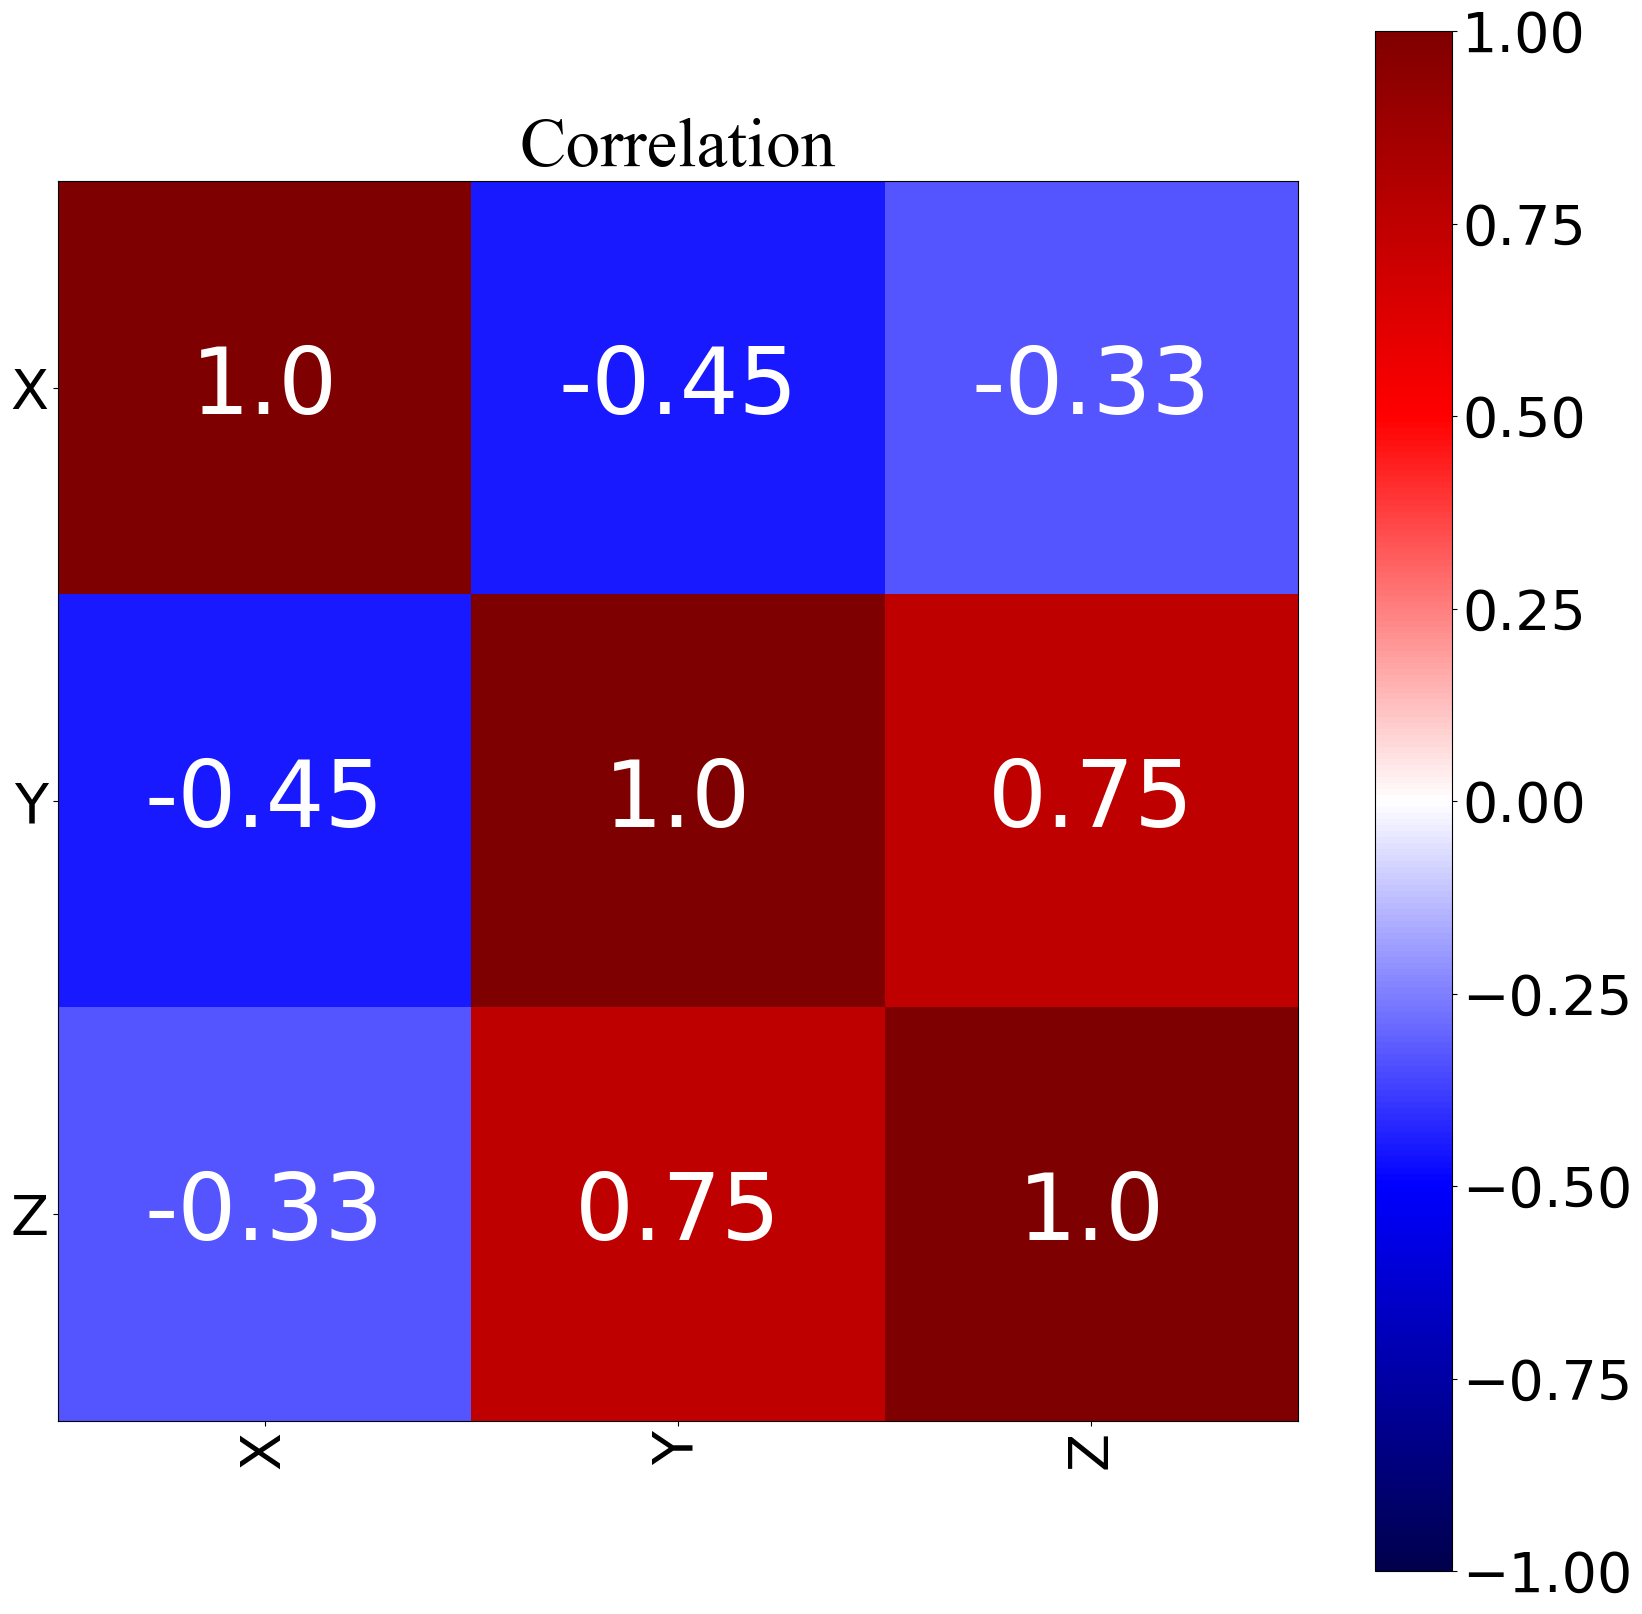

In [5]:
corr_matrix_heatmap(chain.corr(),
                    save_fig = False,
                    pp = None,
                    title = "Correlation")

If we control for $Y$, however, we see that that there is no longer any correlation between $X$ and $Z$. This is called a partial correlation. In the following matrix, partial correlations of each pair are calculated using the remaing variable as a control. We can interpret the result as:

$X \!\perp\!\!\!\perp Z|Y$ 

$Corr(X,Z|Y)\approx 0.00$

First, let's substantiate this intuition using an OLS regression. We run the regression for:

$X = \beta_0 + \beta_Y + \beta_Z + \epsilon_X$

In [6]:
import statsmodels.api as sm

Xc = chain[["X"]]
Xc["Constant"] = 1
Z = chain[["Z"]]

model = sm.OLS(Z, Xc)
results = model.fit()
results.summary()

C:\Users\JLCat\AppData\Local\Temp\ipykernel_18424\3806329196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xc["Constant"] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Z   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                 1.244e+04
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:09:20   Log-Likelihood:            -1.7668e+05
No. Observations:              100000   AIC:                         3.534e+05
Df Residuals:                   99998   BIC:                         3.534e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X             -0.4971      0.004   -111.517      0.000      -0.506      -0.488
Constant      -0.0033      0.004     -0.741      0.459      -0.012       0.005
==============================================================================
Omnibus:                        2.288   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.318   Jarque-Bera (JB):                2.284
Skew:                          -0.012   Prob(JB):                        0.319
Kurtosis:                       3.003   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:

XYc = chain[["Y", "X"]]
XYc["Constant"] = 1
Z = chain[["Z"]]

model = sm.OLS(Z, XYc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Z   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                 6.297e+04
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:09:21   Log-Likelihood:            -1.4179e+05
No. Observations:              100000   AIC:                         2.836e+05
Df Residuals:                   99997   BIC:                         2.836e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Y              0.5021      0.002    317.713      0.000       0.499       0.505
X              0.0090      0.004      2.543      0.011       0.002       0.016
Constant      -0.0029      0.003     -0.915      0.360      -0.009       0.003
==============================================================================
Omnibus:                        1.648   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.644
Skew:                          -0.004   Prob(JB):                        0.439
Kurtosis:                       3.018   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
residuals = {}
def get_residuals(df):
    for y_var in df.keys():
        # save all vars in list of X_vars
        X_vars = list(df.keys())
        ## then remove y_var from X_vars
        X_vars.remove(y_var)
        # save X matrix
        X = df[X_vars]
        # add a constant to the X matrix
        X["Constant"] = 1
        # save y matrix (vector)
        y = df[[y_var]]
        model = sm.OLS(y, X)
        results = model.fit()
        ## save error term identified with each regression
        ## name references the explained variable
        residuals["$\\epsilon_{" + y_var + "}$"] = results.resid
    return pd.DataFrame(residuals)
residuals = get_residuals(chain)
residuals

,$\epsilon_{X}$,$\epsilon_{Y}$,$\epsilon_{Z}$
0,0.383607,0.281028,-0.196844
1,1.389976,0.236670,0.551669
2,-0.507812,-0.702855,0.827912
3,0.338897,1.339820,-0.595300
4,-0.263186,-2.800545,0.570250
...,...,...,...
99995,-0.061401,0.137288,0.279340
99996,-1.178773,1.723802,-1.880775
99997,0.203053,1.816349,-0.676592
99998,-0.816101,-1.181449,0.453399


In [9]:
residuals.corr()

,$\epsilon_{X}$,$\epsilon_{Y}$,$\epsilon_{Z}$
$\epsilon_{X}$,1.000000,0.324457,-0.008042
$\epsilon_{Y}$,0.324457,1.000000,-0.708767
$\epsilon_{Z}$,-0.008042,-0.708767,1.000000


In [10]:
def calculate_partial_corr(residuals):
    pcorr = residuals.corr() * -1
    for x in residuals.keys():
        for y in residuals.keys():
            if x == y:
                pcorr[y][x] = 1
    return pcorr
chain_pcorr = calculate_partial_corr(residuals)
chain_pcorr.rename(columns = {r:r[-3] for r in residuals.keys()}, 
                   index = {r:r[-3] for r in residuals.keys()},
                   inplace = True)
chain_pcorr

,X,Y,Z
X,1.000000,-0.324457,0.008042
Y,-0.324457,1.000000,0.708767
Z,0.008042,0.708767,1.000000


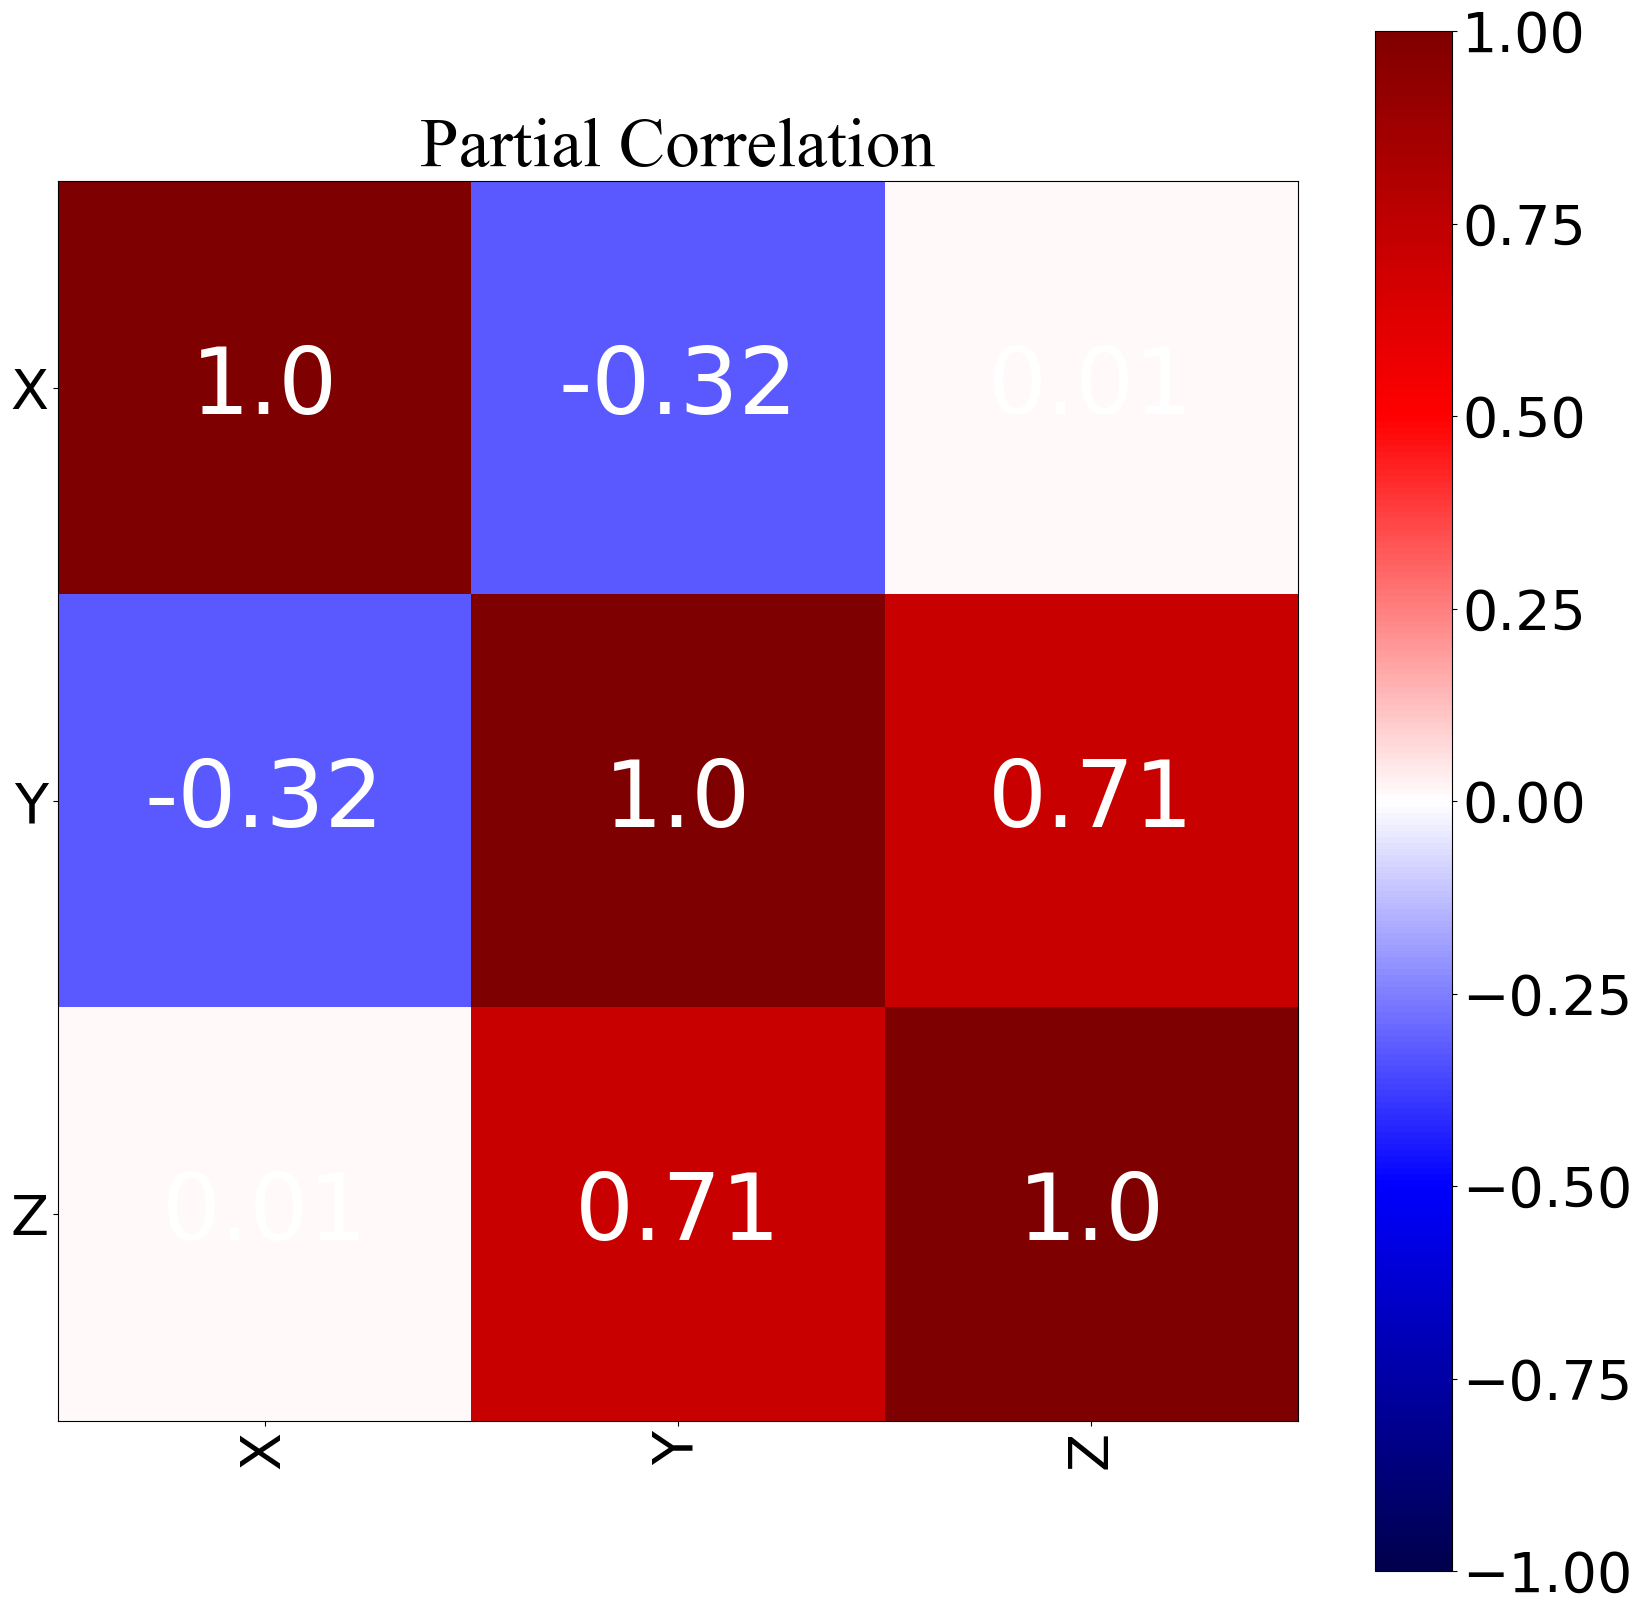

In [11]:
corr_matrix_heatmap(chain_pcorr,
                    save_fig = False,
                    pp = None,
                    title = "Partial Correlation")

In [12]:
# !pip install pingouin
import pingouin
chain.pcorr().round(3)


,X,Y,Z
X,1.000,-0.324,0.008
Y,-0.324,1.000,0.709
Z,0.008,0.709,1.000


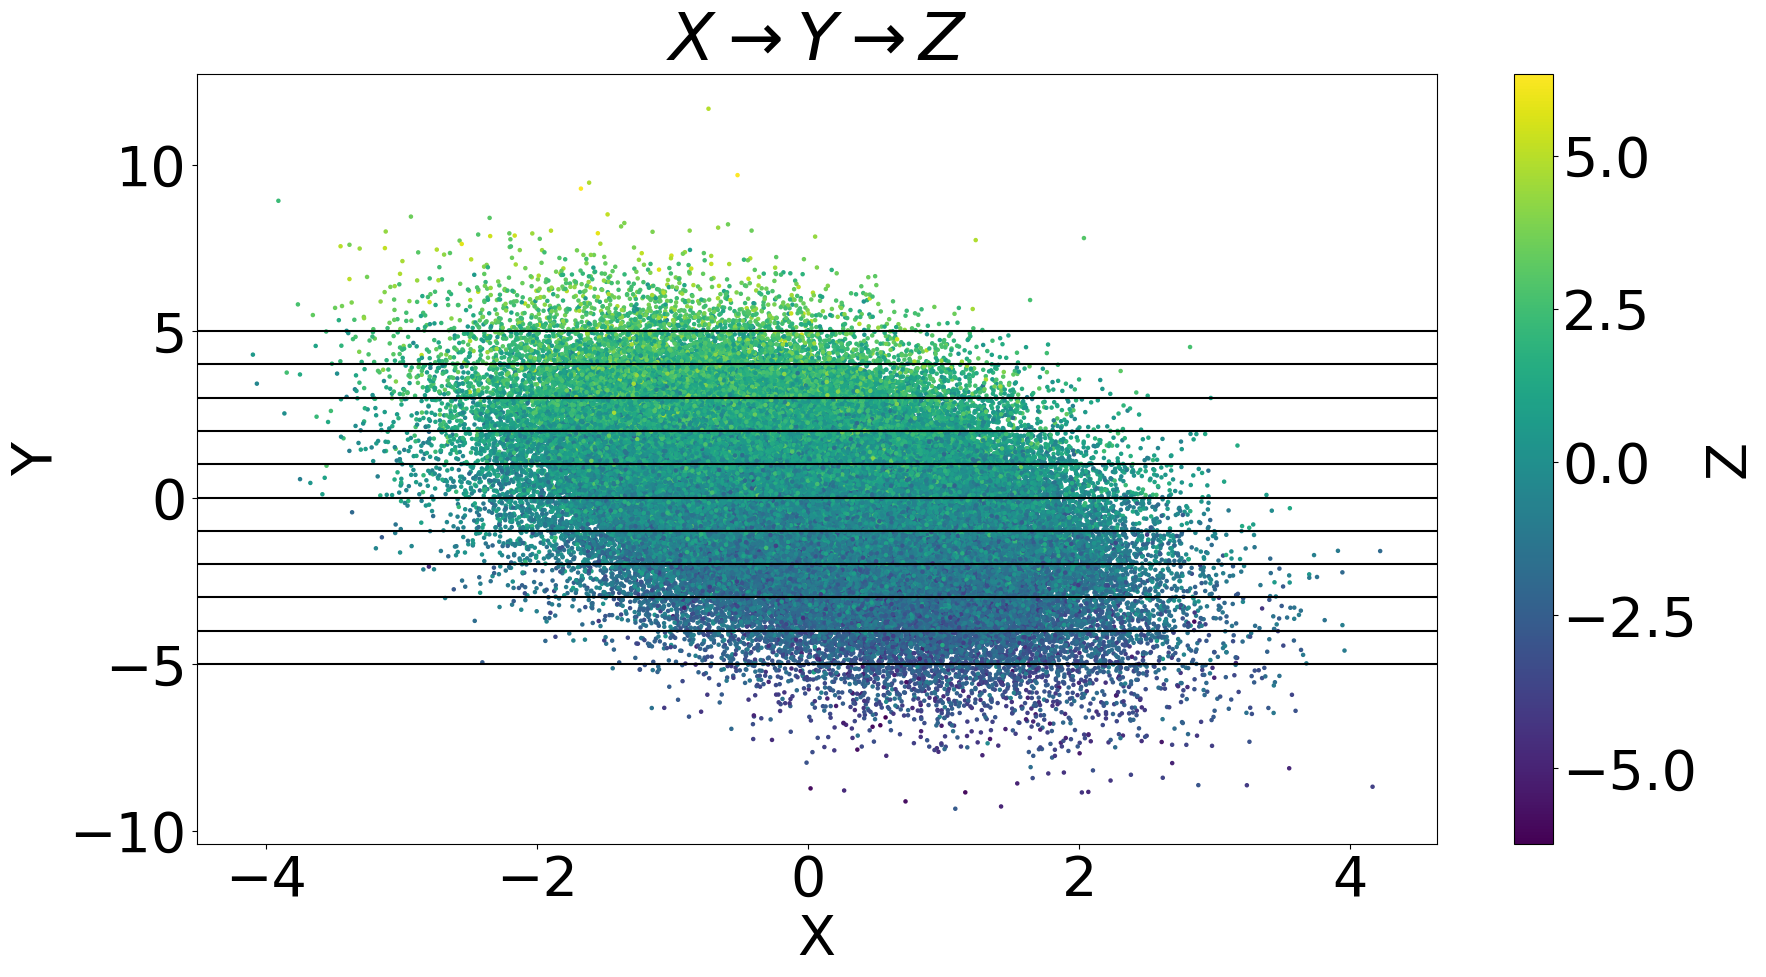

In [13]:
fig, ax = plt.subplots(figsize = (20,10))
chain.plot.scatter(x = "X", y = "Y", c = "Z", cmap = "viridis", s = 5, ax = ax)
ax.set_title("$X \\rightarrow Y \\rightarrow Z$")
for i in range(-5, 6): ax.axhline(i, c = "k")

In [14]:
## Forks

In [15]:
## Colliders